<a href="https://colab.research.google.com/github/rddaz2013/npTDMS/blob/master/datatest/Test_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install npTDMS[hdf,pandas,thermocouple_scaling]

  Created wheel for thermocouples-reference: filename=thermocouples_reference-0.20-cp36-none-any.whl size=19568 sha256=99465e6338940cf8368eaf28f7c98d267840015a58071a5545739cfd80c54e7d
  Stored in directory: /root/.cache/pip/wheels/ce/df/31/be4b6de10f12f4b69bdb04e2f6321b9a2c1301f03dcd4f5b42
Successfully built thermocouples-reference


In [4]:
!git clone https://github.com/rddaz2013/npTDMS.git

fatal: destination path 'npTDMS' already exists and is not an empty directory.


In [6]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy import signal
from matplotlib.dates import DateFormatter
from scipy import fftpack
from scipy.signal import filtfilt, butter, buttord

import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('notebook', font_scale=1.3, rc={'lines.linewidth': 3.0})
import numpy as np

plt.rcParams['figure.figsize'] = (10,10/1.6)

# Einlesen der tdms Datei
# Wichtig wegen der Speicherung der Gruppen und der Zeitachse kann es nicht direkt als Dataframe in
# pandas geladen werden
from nptdms import TdmsFile
tdms_file = TdmsFile("./npTDMS/datatest/Versuch 05 - 161.tdms")

In [7]:
# Iterate over all items in the properties dictionary and print them
for name, value in tdms_file.properties.items():
    print("{0}: {1}".format(name, value))
# Get a single property value

name: Versuch 05 - 161


In [8]:
gf1 = (tdms_file.groups()[0])
for dummy in tdms_file[gf1.name].channels():
    print (dummy)

<TdmsChannel with path /'_unnamedTask<3>'/'Dev1/ai0'>
<TdmsChannel with path /'_unnamedTask<3>'/'Dev1/ai1'>
<TdmsChannel with path /'_unnamedTask<3>'/'Dev1/ai2'>
<TdmsChannel with path /'_unnamedTask<3>'/'Dev1/ai3'>
<TdmsChannel with path /'_unnamedTask<3>'/'Dev1/ai4'>


In [11]:
all_groups=tdms_file[gf1.name].channels()

#channel = all_groups[0] # temperature slow
channel = all_groups[3] # pressure fast

timestamp = channel.properties['wf_start_time']
timestep = channel.properties['wf_increment']

time_array = np.arange(start=0, stop=np.size(channel))
time_array=time_array*timestep
channel_data = channel.data

In [13]:
channel.properties

OrderedDict([('NI_Scaling_Status', 'unscaled'),
             ('NI_Number_Of_Scales', 3),
             ('NI_Scale[1]_Scale_Type', 'Polynomial'),
             ('NI_Scale[1]_Polynomial_Coefficients_Size', 4),
             ('NI_Scale[1]_Polynomial_Coefficients[0]', 3717.2217387015417),
             ('NI_Scale[1]_Polynomial_Coefficients[1]', 6.585674458677389),
             ('NI_Scale[1]_Polynomial_Coefficients[2]', 1.427913774635689e-09),
             ('NI_Scale[1]_Polynomial_Coefficients[3]',
              1.0763380172505354e-13),
             ('NI_Scale[1]_Polynomial_Input_Source', 0),
             ('NI_Scale[2]_Scale_Type', 'Thermocouple'),
             ('NI_Scale[2]_Thermocouple_Thermocouple_Type', 10073),
             ('NI_Scale[2]_Thermocouple_Scaling_Direction', 0),
             ('NI_Scale[2]_Thermocouple_Input_Source', 1),
             ('NI_ChannelName', 'Dev1/ai0'),
             ('unit_string', 'Deg C'),
             ('NI_UnitDescription', 'Deg C'),
             ('wf_start_time', 

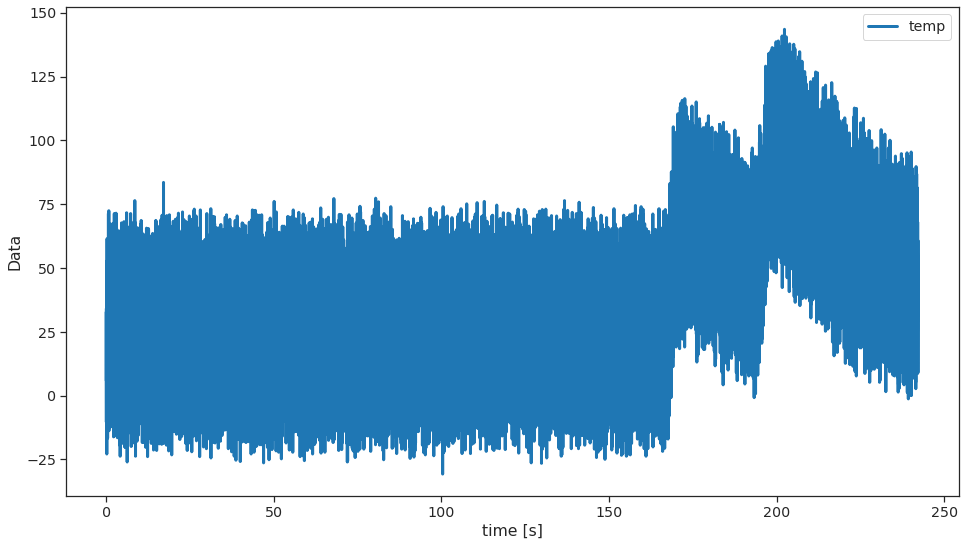

In [16]:
pt=slice(1,3000) # Zeitskala ist * 0.1s
plt.figure(figsize=(16,9))
plt.plot(time_array,channel_data,label='temp')
#plt.xlim([0,300])
#plt.ylim([0.9,1.5])
plt.xlabel('time [s]')
plt.ylabel('Data')
plt.legend()
plt.show()